# Lesson 4 Exercise Solutions

## Exercise 1: Photutils for Aperture Photometry 

#### Objectives
- Use the `CircularAperture` class from `photutils` to conduct Aperature Photometry
- Find relevant details about the photometry including the area, center coordinates, etc
- Make a visual plot of the aperture using `matplotlib`

## Step 1: Import Libraries

Import the following:
- `matplotlib.pyplot`
- `make_4gaussians_image` from `photutils.datasets`
- `CircularAperture` and `ApertureStats` from `photutils`

In [ ]:
import matplotlib.pyplot as plt
from photutils.datasets import make_4gaussians_image
from photutils import CircularAperture, ApertureStats

## Step 2: Initialize Dataset
Invoke the `make_4gaussians_image` function and save it into a variable titled `data`

In [ ]:
data = make_4gaussians_image()

## Step 3: Initialize CircularAperture
- Define a `CircularAperture` positioned at (150px, 25px) with a radius of 8px to a variable titled `aperature`
- Read more about `CircularAperture` here: [https://photutils.readthedocs.io/en/stable/api/photutils.aperture.CircularAperture.html](https://photutils.readthedocs.io/en/stable/api/photutils.aperture.CircularAperture.html)
- Define `statistics` variable and set it equal to `ApertureStats` containing `data` and `aperature`.
- Read more about `ApertureStats` here: [https://photutils.readthedocs.io/en/stable/api/photutils.aperture.ApertureStats.html](https://photutils.readthedocs.io/en/stable/api/photutils.aperture.ApertureStats.html)

In [ ]:
# Create circular aperture
aperature = CircularAperture((150, 25), 8)

# Obtain aperture statistics
statistics = ApertureStats(data, aperature)

## Step 4: Visualize using Matplotlib
- Create a 8 by 8 figure using `matplotlib`
- Show the `data` using `plt.imshow` with a `cmap` parameter set to `gray`
- Plot `aperature` using the code `aperature.plot(color='blue', lw=1.5)`
- Add a colorbar to the plot with a label titled "Counts"
- Add a title to the plot of "Circular Aperture Image"
- Display the plot!

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(data, cmap='gray')
aperature.plot(color='blue', lw=1.5)
plt.colorbar(label='Counts')
plt.title('Circular Aperture Image')
plt.show()

## Step 5: Get Details about ApertureStats
- Print out the following properties of `statistics`:
1.  `centroid`: coordinate of the centroid (center of mass)
2.  `bbox`: bounding box of aperature
3.  `sum`: sum of the unmasked data values within the aperture
4.  `std`: standard deviation of the unmasked pixel values within the aperture
5.  `n_apertures`: number of positions in the input aperture
6.  `median`: median of the unmasked pixel values within the aperture
7.  `eccentricity`: eccentricity of the 2D Gaussian function that has the same second-order moments as the source

In [ ]:
print("Centroid:", statistics.centroid)
print("Bounding Box:", statistics.bbox)
print("Sum:", statistics.sum)
print("Standard Deviation:", statistics.std)
print("Number of Aperatures:", statistics.n_apertures)
print("Median:", statistics.median)
print("Eccentricity:", statistics.eccentricity)

## Exercise 2: Continuum Fitting with Specutils

#### Objectives:
- Create a generic Continuum Fitting using `fit_generic_continuum` from `specutils`
- Visualize the fitting using `matplotlib`

## Step 1: Import Libraries

Import the following:
- `numpy`
- `matplotlib.pyplot`
- `models` from `astropy.modeling`
- `units` from `astropy`
- `Spectrum1D` and `SpectralRegion` from `specutils.spectra`
- `fit_generic_continuum` from `specutils.fitting`

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models
from astropy import units as u
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum

## Step 2: Generate Random Spectra

In [78]:
np.random.seed(0)
x = np.linspace(0., 10., 200)
y = 3 * np.exp(-0.5 * (x- 6.3)**2 / 0.8**2)
y += np.random.normal(0., 0.2, x.shape)
spectra = Spectrum1D(flux=y*u.Jy, spectral_axis=x*u.um)

## Step 3: Create a Continuum Fitting 

In [79]:
y_continuum = 3 * np.exp(-0.5 * (x - 6.3)**2 / 0.8**2)
y += y_continuum

## Step 4: Create a Model Spectra using Spectrum1D
- Define a `Spectrum1D` to variable named `spectra` with the following parameter configurations:
1. `flux=y*u.Jy`
2. `spectral_axis=x*u.um`
- Define `continuum_fit` and set it to the `fit_generic_continuum` output of `spectra`
- Define `y_continuum_fit` and set it to `g1_fit` of `x*u.um`

In [83]:
spectra = Spectrum1D(flux=y*u.Jy, spectral_axis=x*u.um)
continuum_fit = fit_generic_continuum(spectra)
y_continuum_fit = g1_fit(x*u.um)

## Step 5: Visualize a Spectra using matplotlib
- Create a subplot using `matplotlib`
- Plot the random spectra `x, y`
- Plot the continuum fitting `x, y_continuum_fit`
- Set the title of the plot to be "Continuum Fitting"
- Display the plot with grid settings!

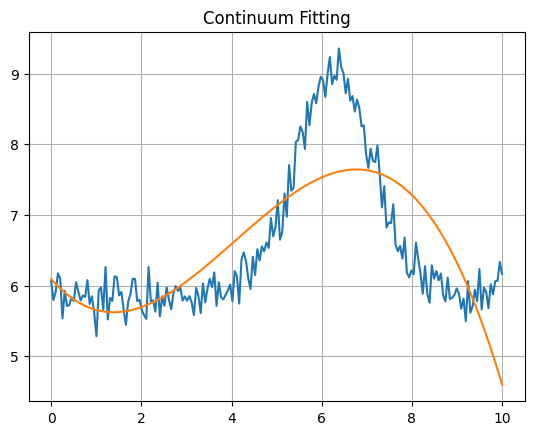

In [84]:
f, ax = plt.subplots()  
ax.plot(x, y)  
ax.plot(x, y_continuum_fit)  
ax.set_title("Continuum Fitting")  
ax.grid(True)
plt.show()